In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

# Import Data

In [2]:
df = pd.read_csv('01 Result Data Cleaning Part 1.csv')

numeric_columns = [col for col in df.columns if '(air)' in col]
categorical_columns = [col for col in df.columns if '(cuaca)' in col]

In [3]:
df.head()

,Tanggal,ID_Raw,ID_Cleaned,Pukul,Katulampa (air),Katulampa (cuaca),Depok (air),Depok (cuaca),Manggarai (air),Manggarai (cuaca),...,Pluit (air),Pluit (cuaca),Pasar Ikan (air),Pasar Ikan (cuaca),Cipinang (air),Cipinang (cuaca),Sunter (air),Sunter (cuaca),Pulo Gadung (air),Pulo Gadung (cuaca)
0,16/10/2021,194.0,140,00:00,10.0,Mendung,80.0,Terang,555.0,Terang,...,-190.0,Terang,-190.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
1,16/10/2021,193.0,141,01:00,10.0,Mendung Tipis,95.0,Terang,555.0,Terang,...,-190.0,Terang,155.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
2,16/10/2021,192.0,142,02:00,10.0,Mendung Tipis,95.0,Terang,555.0,Terang,...,-190.0,Terang,155.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
3,16/10/2021,191.0,143,03:00,10.0,Mendung Tipis,90.0,Terang,555.0,Terang,...,-190.0,Terang,140.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
4,16/10/2021,190.0,144,04:00,10.0,Mendung Tipis,90.0,Terang,560.0,Terang,...,-190.0,Terang,146.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang


# Data Cleaning

In [4]:
df.isna().sum()

Tanggal                  0
ID_Raw                  28
ID_Cleaned               0
Pukul                    0
Katulampa (air)         34
Katulampa (cuaca)       41
Depok (air)             30
Depok (cuaca)           40
Manggarai (air)         31
Manggarai (cuaca)       39
Karet (air)             30
Karet (cuaca)           42
Krukut (air)            30
Krukut (cuaca)          39
Pesanggrahan (air)      30
Pesanggrahan (cuaca)    36
Angke (air)             30
Angke (cuaca)           40
Pluit (air)             32
Pluit (cuaca)           45
Pasar Ikan (air)        30
Pasar Ikan (cuaca)      45
Cipinang (air)          32
Cipinang (cuaca)        43
Sunter (air)            31
Sunter (cuaca)          42
Pulo Gadung (air)       35
Pulo Gadung (cuaca)     58
dtype: int64

## Impute Missing Data

In [5]:
df_imputed = df.copy()

In [6]:
for col in numeric_columns:
    # Get the mask of missing values
    missing_mask = df_imputed[col].isna()
    
    # Skip if no missing values
    if not missing_mask.any():
        continue
        
    # Simple imputation with before-after average
    df_imputed[col] = df_imputed[col].fillna(
        (df_imputed[col].shift(1) + df_imputed[col].shift(-1)) / 2
    )

# For categorical columns - use forward fill
categorical_columns = [col for col in df.columns if '(cuaca)' in col]
for col in categorical_columns:
    df_imputed[col] = df_imputed[col].ffill()

In [7]:
df_imputed.isna().sum()

Tanggal                  0
ID_Raw                  28
ID_Cleaned               0
Pukul                    0
Katulampa (air)          0
Katulampa (cuaca)        0
Depok (air)              0
Depok (cuaca)            0
Manggarai (air)          0
Manggarai (cuaca)        0
Karet (air)              0
Karet (cuaca)            0
Krukut (air)             0
Krukut (cuaca)           0
Pesanggrahan (air)       0
Pesanggrahan (cuaca)     0
Angke (air)              0
Angke (cuaca)            0
Pluit (air)              0
Pluit (cuaca)            0
Pasar Ikan (air)         0
Pasar Ikan (cuaca)       0
Cipinang (air)           0
Cipinang (cuaca)         0
Sunter (air)             0
Sunter (cuaca)           0
Pulo Gadung (air)        0
Pulo Gadung (cuaca)      0
dtype: int64

## Convert 'Tanggal' to Datetime

In [8]:
df_cleaned = df_imputed.copy()
df_cleaned['Tanggal'] = pd.to_datetime(df_cleaned['Tanggal']+" "+ df_cleaned['Pukul'], dayfirst=True)
df_cleaned.drop('Pukul', axis=1, inplace=True)
df_cleaned.set_index('Tanggal', inplace=True)
df_cleaned.head()

,ID_Raw,ID_Cleaned,Katulampa (air),Katulampa (cuaca),Depok (air),Depok (cuaca),Manggarai (air),Manggarai (cuaca),Karet (air),Karet (cuaca),...,Pluit (air),Pluit (cuaca),Pasar Ikan (air),Pasar Ikan (cuaca),Cipinang (air),Cipinang (cuaca),Sunter (air),Sunter (cuaca),Pulo Gadung (air),Pulo Gadung (cuaca)
Tanggal,,,,,,,,,,,,,,,,,,,,,
2021-10-16 00:00:00,194.0,140,10.0,Mendung,80.0,Terang,555.0,Terang,25.0,Terang,...,-190.0,Terang,-190.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
2021-10-16 01:00:00,193.0,141,10.0,Mendung Tipis,95.0,Terang,555.0,Terang,250.0,Terang,...,-190.0,Terang,155.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
2021-10-16 02:00:00,192.0,142,10.0,Mendung Tipis,95.0,Terang,555.0,Terang,250.0,Terang,...,-190.0,Terang,155.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
2021-10-16 03:00:00,191.0,143,10.0,Mendung Tipis,90.0,Terang,555.0,Terang,250.0,Terang,...,-190.0,Terang,140.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
2021-10-16 04:00:00,190.0,144,10.0,Mendung Tipis,90.0,Terang,560.0,Terang,250.0,Terang,...,-190.0,Terang,146.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang


## Only take Katulampa, Depok, and Manggarai

In [9]:
df_final = df_cleaned[['Katulampa (air)', 'Katulampa (cuaca)', 'Depok (air)', 'Depok (cuaca)', 'Manggarai (air)', 'Manggarai (cuaca)']]
df_final.head()

,Katulampa (air),Katulampa (cuaca),Depok (air),Depok (cuaca),Manggarai (air),Manggarai (cuaca)
Tanggal,,,,,,
2021-10-16 00:00:00,10.0,Mendung,80.0,Terang,555.0,Terang
2021-10-16 01:00:00,10.0,Mendung Tipis,95.0,Terang,555.0,Terang
2021-10-16 02:00:00,10.0,Mendung Tipis,95.0,Terang,555.0,Terang
2021-10-16 03:00:00,10.0,Mendung Tipis,90.0,Terang,555.0,Terang
2021-10-16 04:00:00,10.0,Mendung Tipis,90.0,Terang,560.0,Terang


In [10]:
del df, df_imputed, df_cleaned, numeric_columns, categorical_columns

# Exploratory Data Analysis

## Correlation Between Pintu Air

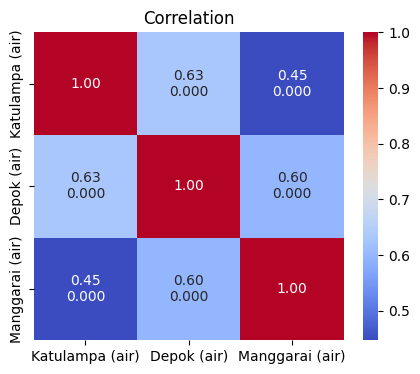

In [11]:
numeric_columns = [col for col in df_final.columns if '(air)' in col]

corr = df_final[numeric_columns].corr()

# Calculate p-values and create simple annotations
annot = np.empty_like(corr, dtype=object)
for i in range(len(numeric_columns)):
    for j in range(len(numeric_columns)):
        r = corr.iloc[i,j]
        
        # Display correlation value with 2 decimal places
        if i == j:
            annot[i,j] = f'{r:.2f}'
        else:
            p = pearsonr(df_final[numeric_columns[i]], 
                            df_final[numeric_columns[j]])

            # Show correlation on top line, p-value on bottom line
            annot[i,j] = f'{r:.2f}\n{p.pvalue:.3f}'

# Clean the column labels
clean_labels = [col.replace(' (air)', '') for col in numeric_columns]

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=annot, fmt='', cmap='coolwarm')
plt.title('Correlation')
plt.show()

## Time Series Plot

In [12]:
def ts_plot(data, col):
    plt.figure(figsize=(20, 6))
    plt.plot(data.index, data[col])
    plt.title(col)
    plt.xlabel('Tanggal')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

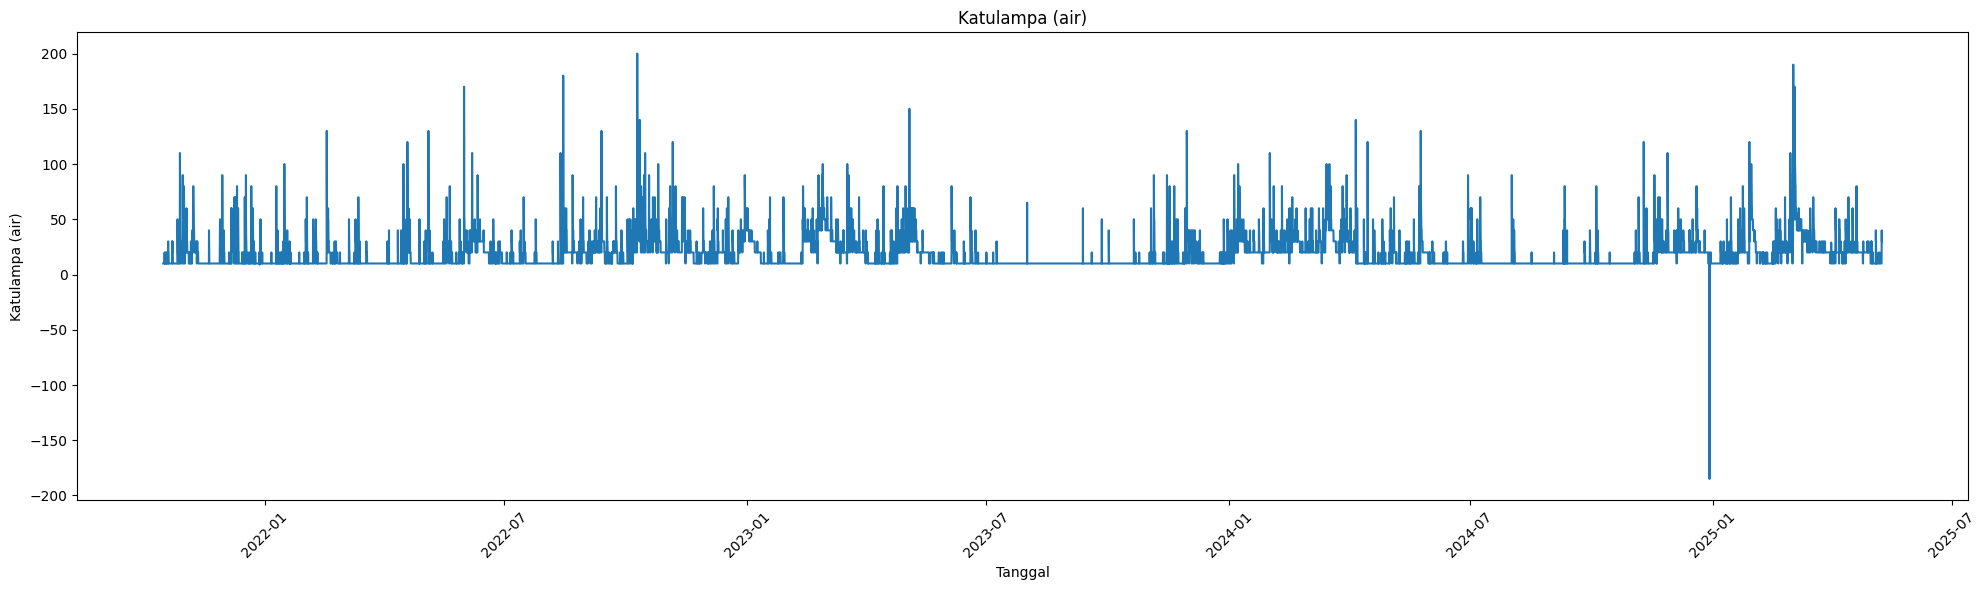

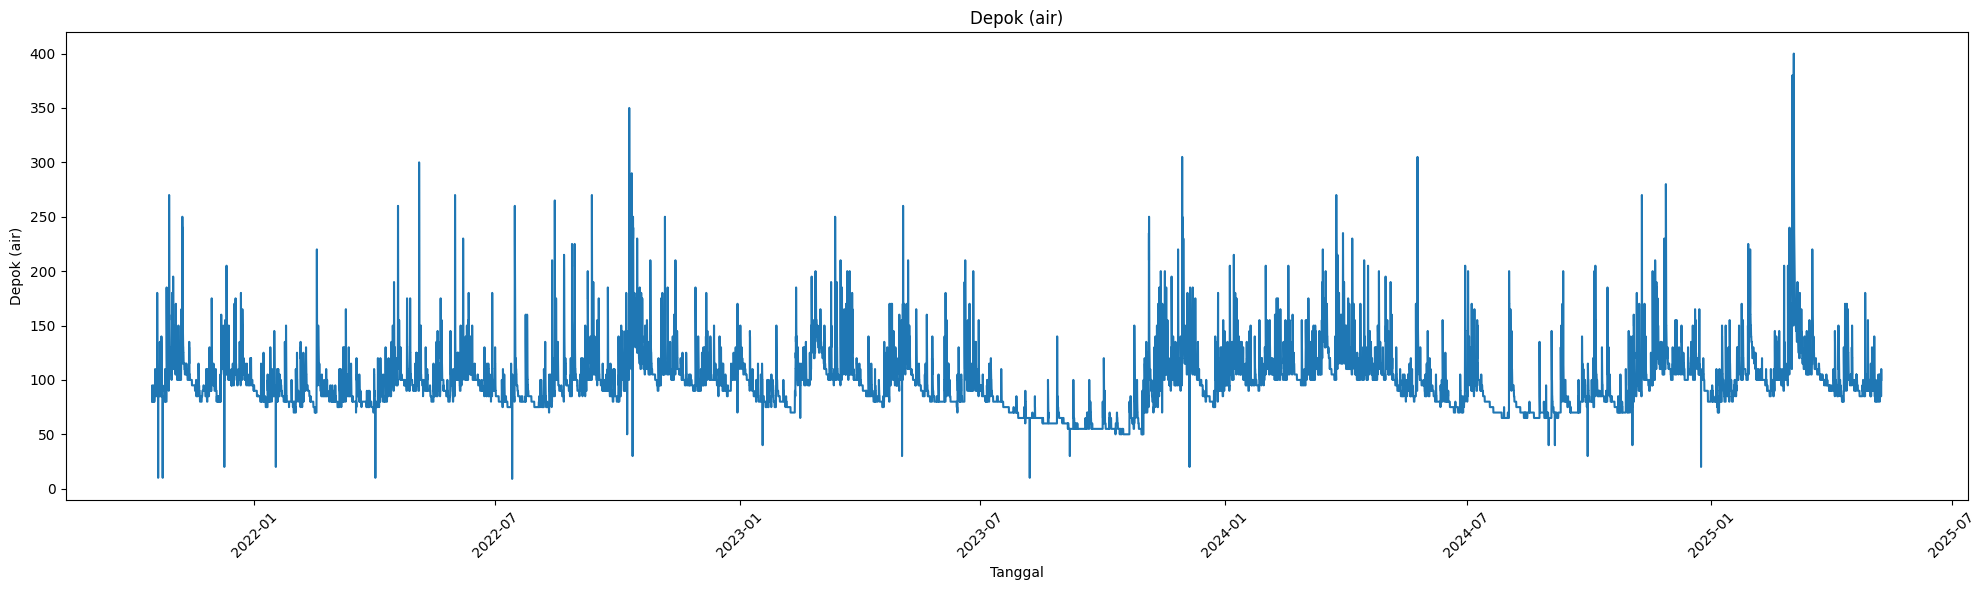

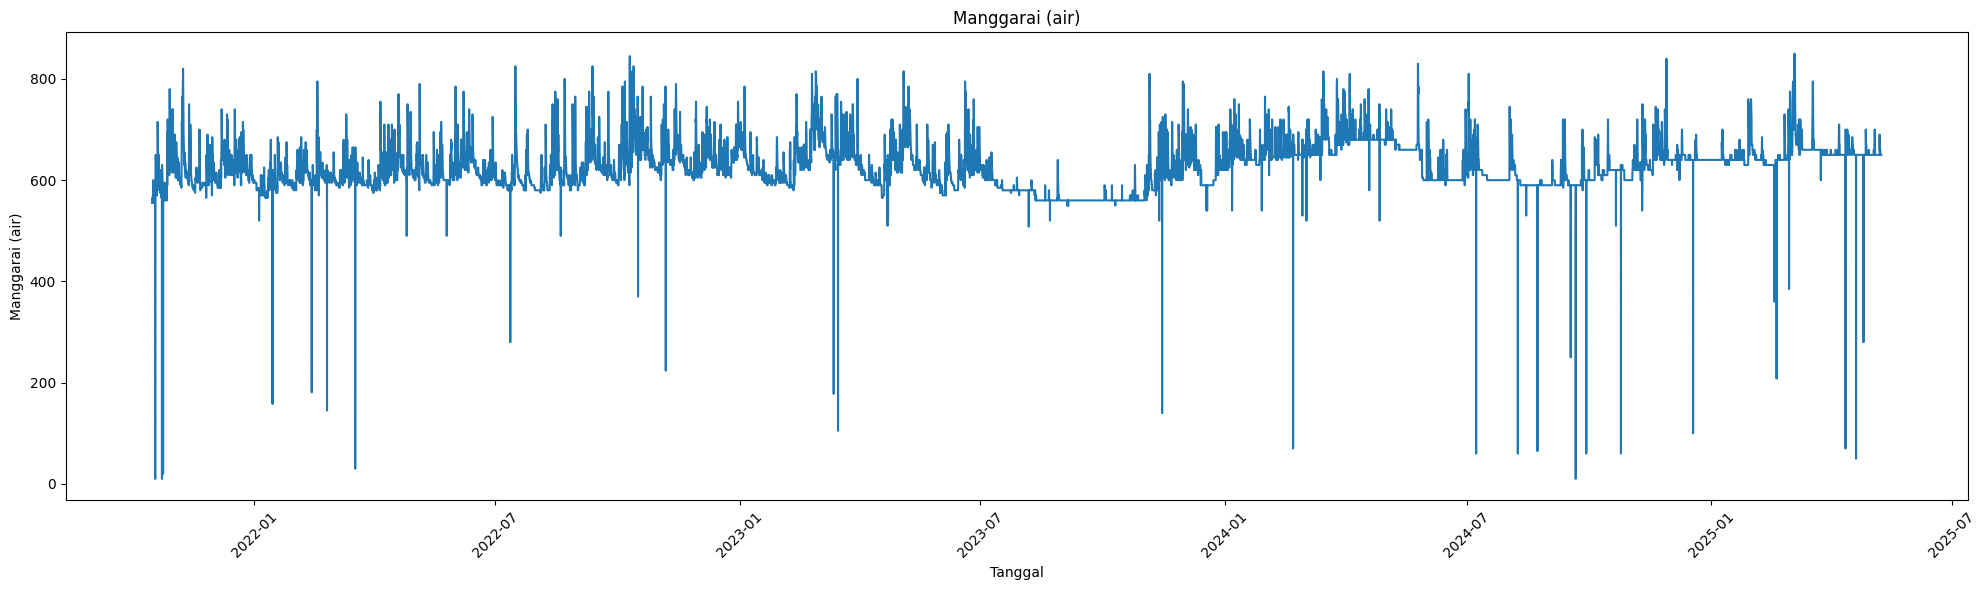

In [13]:
for i in range(len(numeric_columns)):
    ts_plot(df_final, numeric_columns[i])

In [14]:
df_final_cleaned = df_final.copy()

def impute(col, min_val):
    # Get the actual index values instead of using integer positions
    indices = df_final_cleaned.index.tolist()
    
    for i, idx in enumerate(indices):
        if df_final_cleaned.at[idx, col] < min_val:
            if i == 0:
                # First row: use next row's value
                df_final_cleaned.at[idx, col] = df_final_cleaned.at[indices[i + 1], col]
            elif i == len(indices) - 1:  # Fixed: was missing -1
                # Last row: use previous row's value
                df_final_cleaned.at[idx, col] = df_final_cleaned.at[indices[i - 1], col]
            else:
                # Middle rows: use average of adjacent values
                prev_val = df_final_cleaned.at[indices[i - 1], col]
                next_val = df_final_cleaned.at[indices[i + 1], col]
                df_final_cleaned.at[idx, col] = (prev_val + next_val) / 2

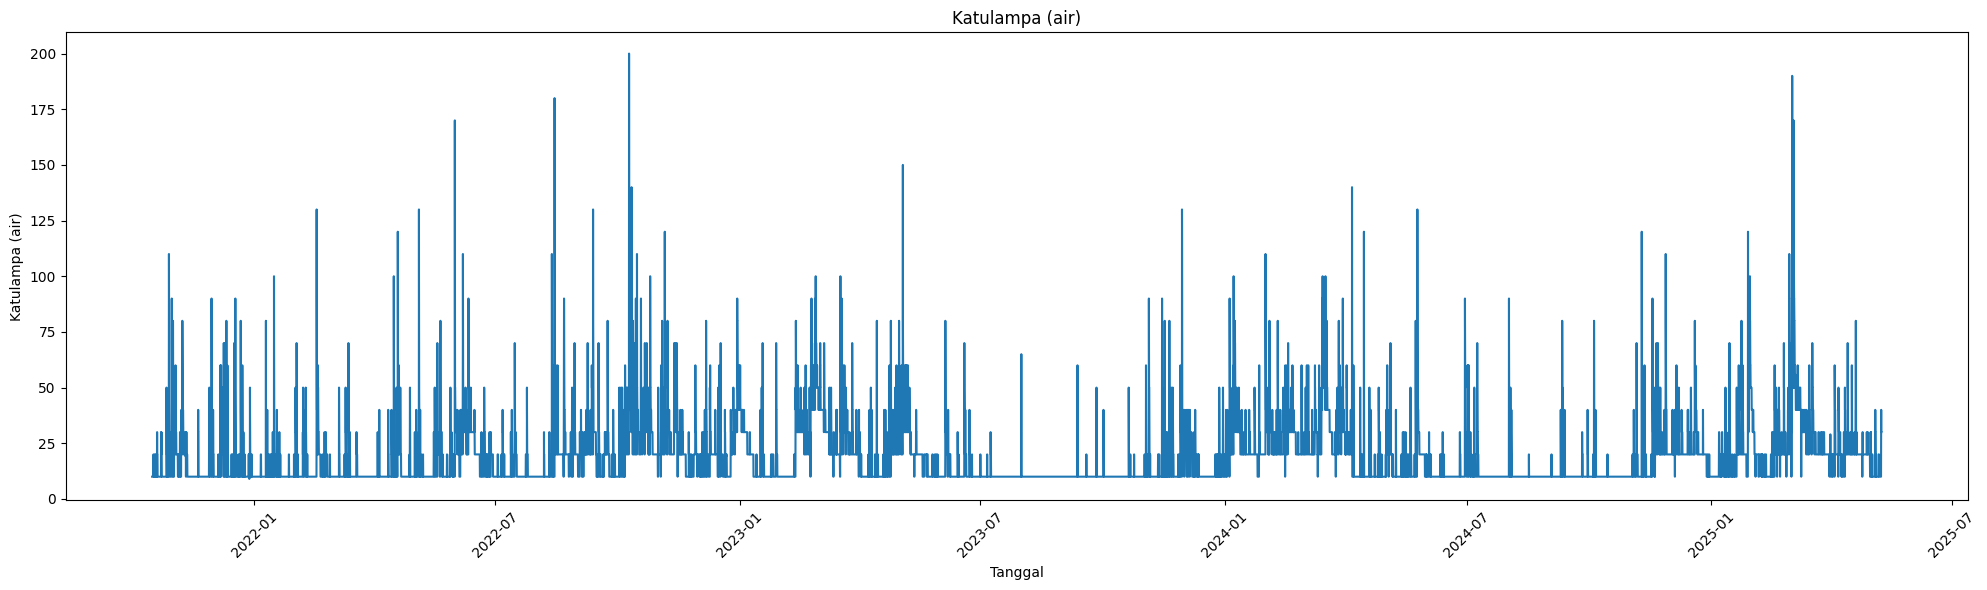

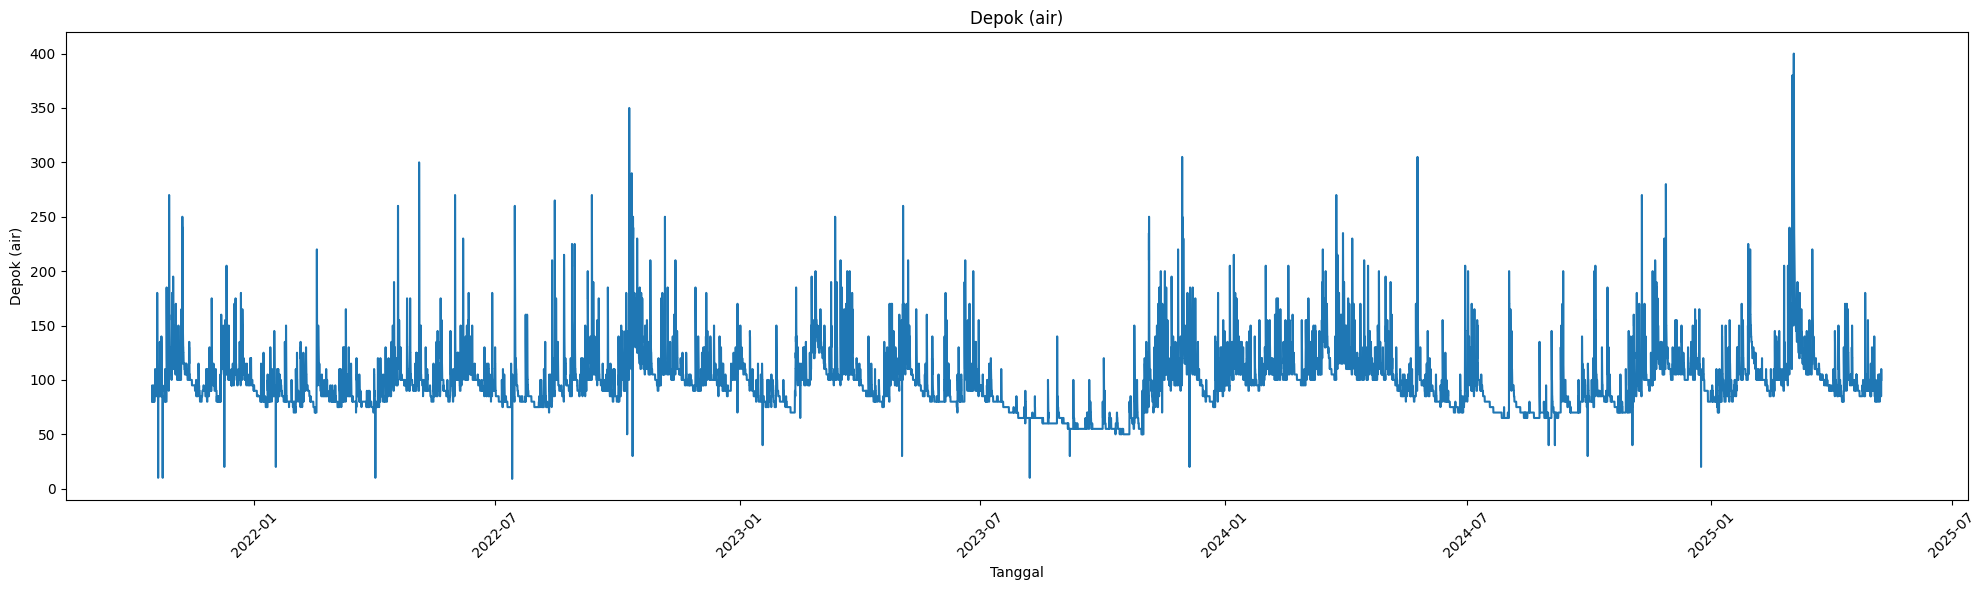

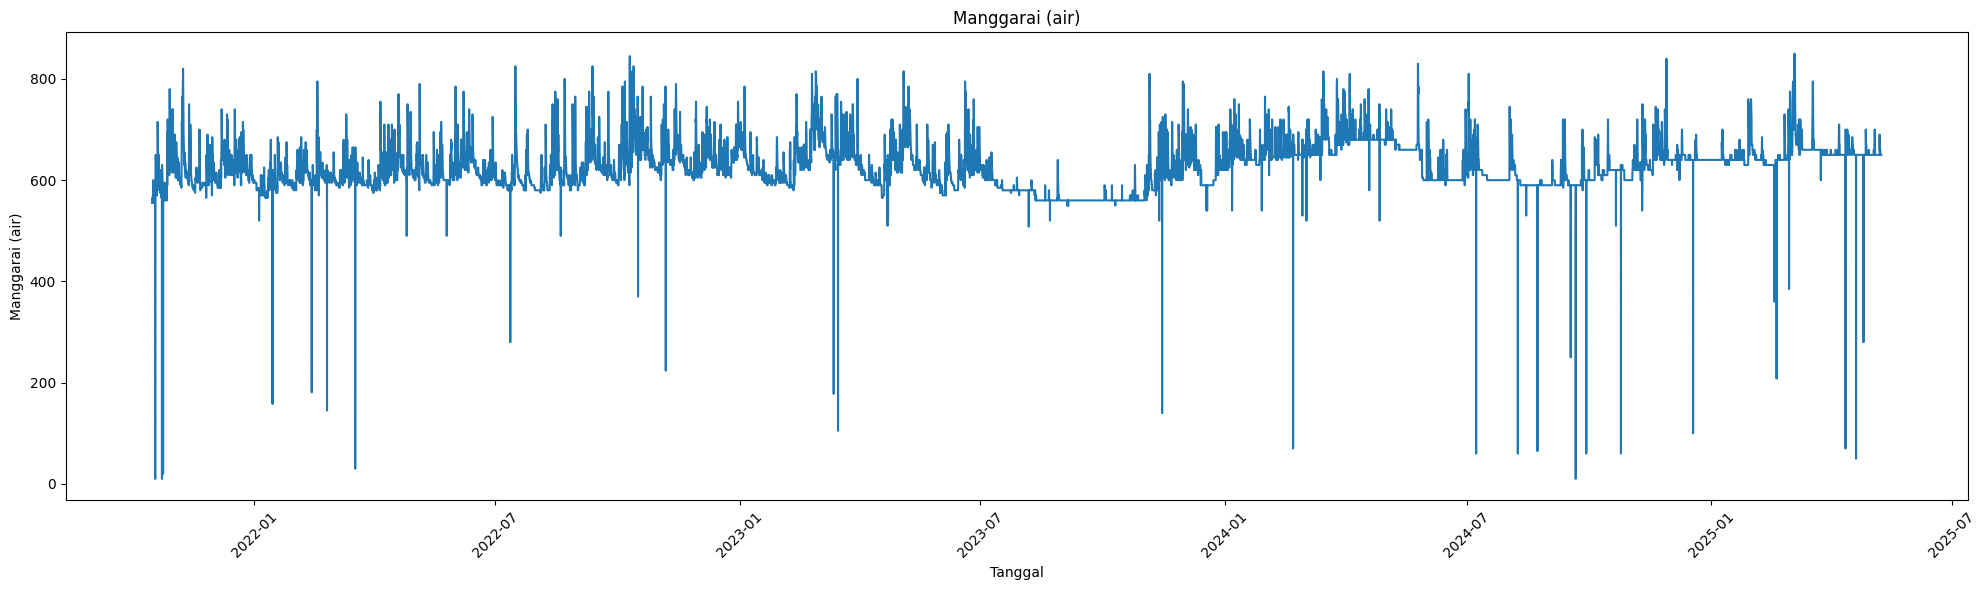

In [15]:
for col in numeric_columns:
    impute(col, 0)
    ts_plot(df_final_cleaned, col)

## Boxplot

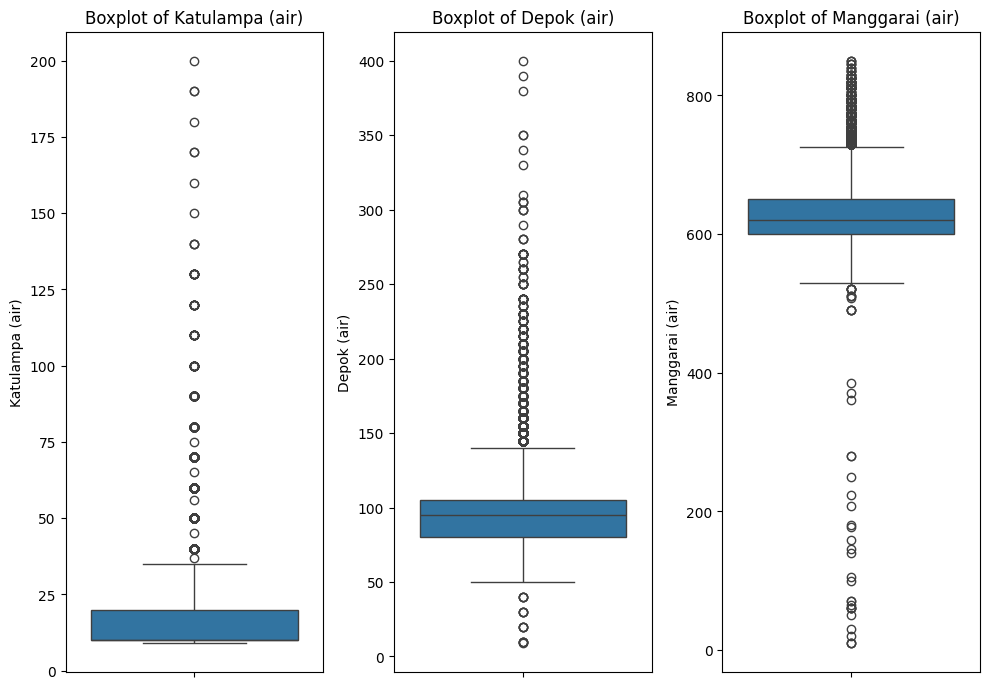

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 7))

# Create boxplots for the 3 numeric columns
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df_final_cleaned[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## Cross Correlation to Pintu Air Manggarai

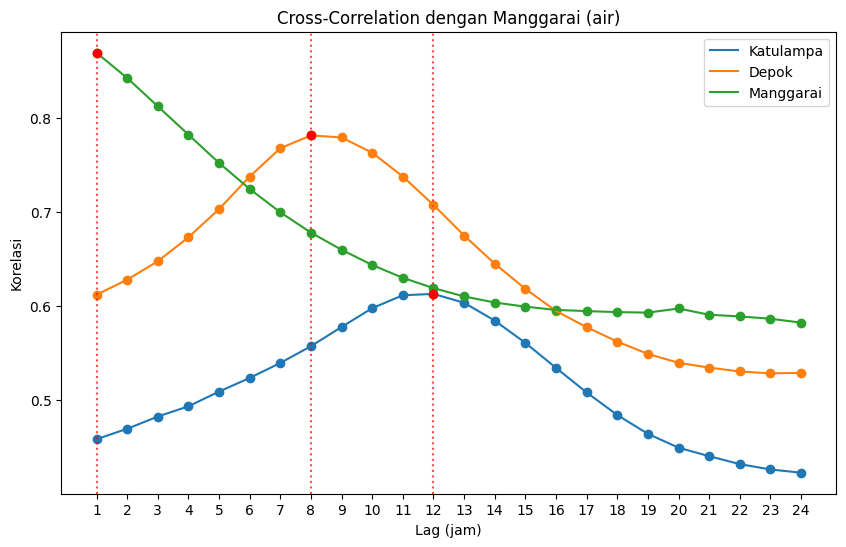

In [17]:
max_lag = 24
cross_corr = {}

for col in ["Katulampa (air)", "Depok (air)", "Manggarai (air)"]:
    corr_lags = []
    for lag in range(1, max_lag+1):
        shifted = df_final_cleaned[col].shift(lag)
        corr = shifted.corr(df_final_cleaned['Manggarai (air)'])
        corr_lags.append((lag, corr))
    cross_corr[col] = corr_lags

plt.figure(figsize=(10, 6))

for col in ["Katulampa (air)", "Depok (air)", "Manggarai (air)"]:
    lags, corrs = zip(*cross_corr[col])
    plt.plot(lags, corrs, label=col.replace(" (air)", ""))
    plt.scatter(lags, corrs)

    # Highlight maximum correlation point
    max_idx = corrs.index(max(corrs))
    max_lag = lags[max_idx]
    max_corr = corrs[max_idx]
    plt.axvline(x=max_lag, color="red", linestyle=":", alpha=0.7)
    plt.scatter([max_lag], [max_corr], color="red", zorder=5)

# Add guideline for every one lag
plt.xticks(lags)

plt.title("Cross-Correlation dengan Manggarai (air)")
plt.xlabel("Lag (jam)")
plt.ylabel("Korelasi")
plt.legend()
plt.show()

In [18]:
df_final_cleaned.head()

,Katulampa (air),Katulampa (cuaca),Depok (air),Depok (cuaca),Manggarai (air),Manggarai (cuaca)
Tanggal,,,,,,
2021-10-16 00:00:00,10.0,Mendung,80.0,Terang,555.0,Terang
2021-10-16 01:00:00,10.0,Mendung Tipis,95.0,Terang,555.0,Terang
2021-10-16 02:00:00,10.0,Mendung Tipis,95.0,Terang,555.0,Terang
2021-10-16 03:00:00,10.0,Mendung Tipis,90.0,Terang,555.0,Terang
2021-10-16 04:00:00,10.0,Mendung Tipis,90.0,Terang,560.0,Terang


## Decompose Manggarai

In [26]:
def plot_decompose(decomposition):
    # Create the decomposition plot
    fig, axes = plt.subplots(4, 1, figsize=(50, 10))
    fig.suptitle('Seasonal Decomposition of Pasar Ikan Water Level',
                fontsize=16, fontweight='bold')

    # Original time series
    axes[0].plot(decomposition.observed.index, decomposition.observed.values,
                color='blue', linewidth=0.8)
    axes[0].set_title('Original Time Series')
    axes[0].set_ylabel('Water Level')
    axes[0].grid(True, alpha=0.3)

    # Trend component
    axes[1].plot(decomposition.trend.index, decomposition.trend.values,
                color='red', linewidth=1.2)
    axes[1].set_title('Trend Component')
    axes[1].set_ylabel('Trend')
    axes[1].grid(True, alpha=0.3)

    # Seasonal component
    axes[2].plot(decomposition.seasonal.index, decomposition.seasonal.values,
                color='green', linewidth=0.8)
    axes[2].set_title('Seasonal Component (24-hour cycle)')
    axes[2].set_ylabel('Seasonal')
    axes[2].grid(True, alpha=0.3)

    # Residual component
    axes[3].plot(decomposition.resid.index, decomposition.resid.values,
                color='purple', linewidth=0.8)
    axes[3].set_title('Residual Component')
    axes[3].set_ylabel('Residuals')
    axes[3].set_xlabel('Date')
    axes[3].grid(True, alpha=0.3)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

    # Plot the 20 days seasonal component
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(decomposition.seasonal.head(480))
    ax.set_title('Seasonal Component (20 days)')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

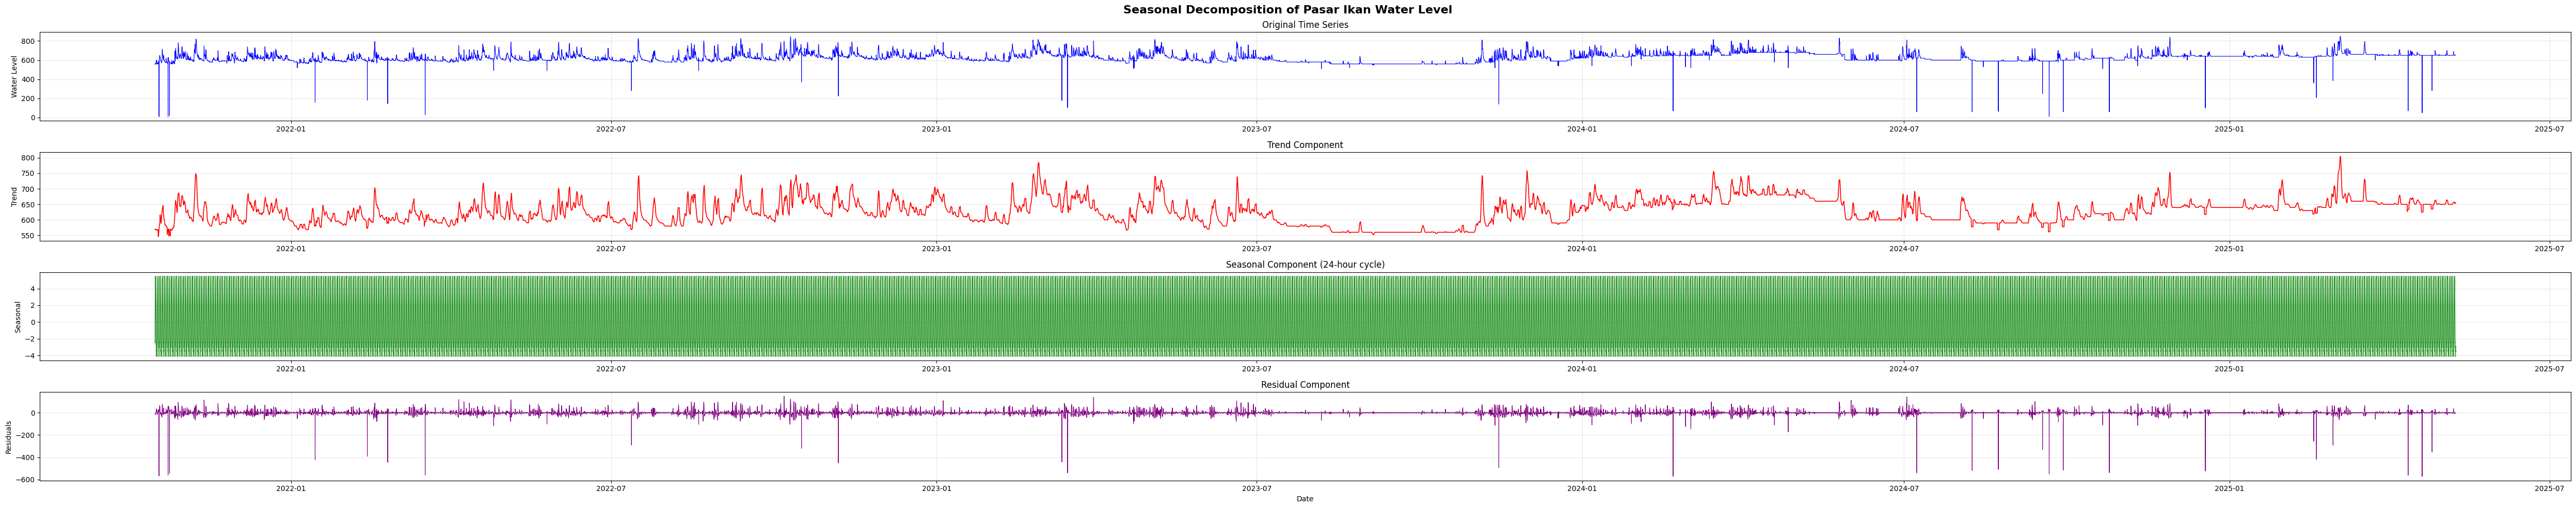

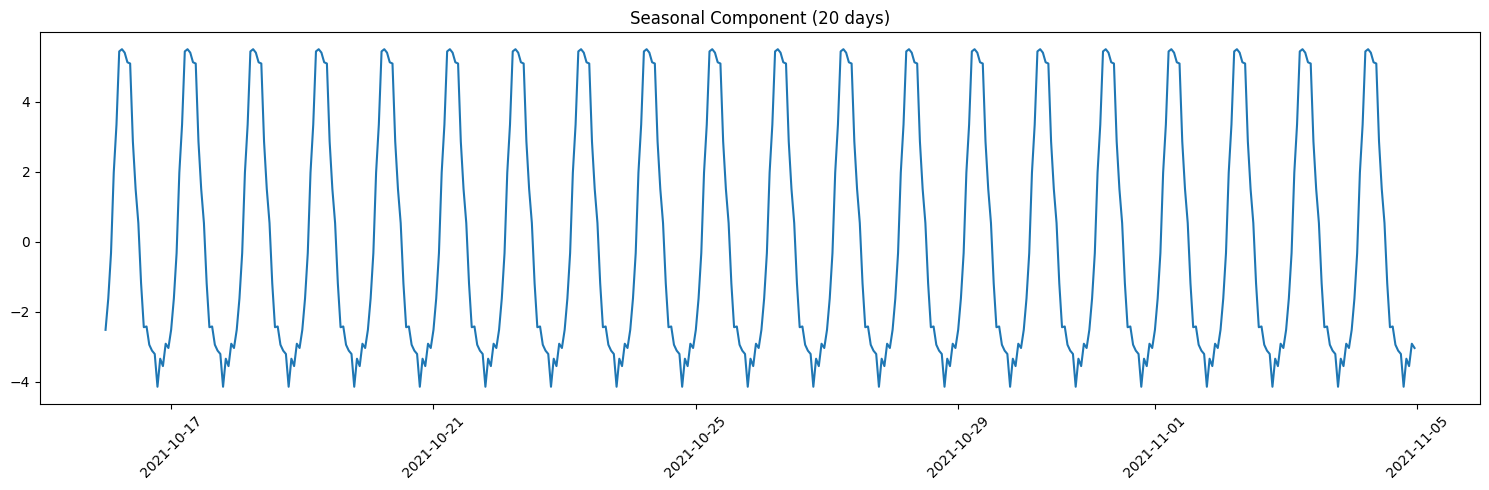

In [27]:
period = 24

decomposition = seasonal_decompose(
    df_final_cleaned['Manggarai (air)'],
    model='additive',
    period=period,
    extrapolate_trend='freq'
)
plot_decompose(decomposition)

# Time Series Regression

In [29]:
df_reg = df_final_cleaned.copy()
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31224 entries, 2021-10-16 00:00:00 to 2025-05-08 23:00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Katulampa (air)    31224 non-null  float64
 1   Katulampa (cuaca)  31224 non-null  object 
 2   Depok (air)        31224 non-null  float64
 3   Depok (cuaca)      31224 non-null  object 
 4   Manggarai (air)    31224 non-null  float64
 5   Manggarai (cuaca)  31224 non-null  object 
dtypes: float64(3), object(3)
memory usage: 2.7+ MB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming df_reg is your cleaned dataframe
# df_reg = df_final_cleaned.copy()

# Step 1: One-hot encode weather data first
def create_weather_dummies(df):
    """
    Create one-hot encoded columns for weather data
    """
    df_encoded = df.copy()
    
    # Get unique weather conditions across all stations
    weather_cols = ['Katulampa (cuaca)', 'Depok (cuaca)', 'Manggarai (cuaca)']
    
    for col in weather_cols:
        # Create dummy variables for each weather column
        station_name = col.replace(' (cuaca)', '')
        dummies = pd.get_dummies(df_encoded[col], prefix=f'{station_name}_weather')
        
        # Add dummy columns to dataframe
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        
        # Drop original weather column
        df_encoded = df_encoded.drop(col, axis=1)
    
    return df_encoded

# Step 2: Create lagged features
def create_lagged_features(df, target_col, lag_list, suffix=''):
    """
    Create lagged features for a specific column
    
    Parameters:
    df: DataFrame
    target_col: Column name to create lags for
    lag_list: List of lag periods (e.g., [0, 1, 2, 3])
    suffix: Suffix to add to column names
    """
    df_lagged = df.copy()
    
    for lag in lag_list:
        if lag == 0:
            # Lag 0 is the current value
            col_name = f"{target_col.replace(' (air)', '')}{suffix}"
        else:
            col_name = f"{target_col.replace(' (air)', '')}{suffix} Lag {lag}"
        
        df_lagged[col_name] = df[target_col].shift(lag)
    
    return df_lagged

# Step 3: Main function to create all lagged features
def create_regression_dataset(df_reg):
    """
    Create complete regression dataset with lagged features
    """
    print("Original dataset shape:", df_reg.shape)
    
    # Step 1: One-hot encode weather data
    print("\n1. One-hot encoding weather data...")
    df_encoded = create_weather_dummies(df_reg)
    print("After encoding weather data:", df_encoded.shape)
    
    # Step 2: Create lagged features for air/water level data
    print("\n2. Creating lagged features...")
    
    # Katulampa: lag 0-14 for air
    katulampa_lags = list(range(0, 15))  # 0 to 14
    df_encoded = create_lagged_features(df_encoded, 'Katulampa (air)', katulampa_lags)
    
    # Depok: lag 0-14 for air
    depok_lags = list(range(0, 15))  # 0 to 14
    df_encoded = create_lagged_features(df_encoded, 'Depok (air)', depok_lags)
    
    # Manggarai: lag 0-5 and 24 for air
    manggarai_lags = list(range(0, 6)) + [24]  # 0,1,2,3,4,5,24
    df_encoded = create_lagged_features(df_encoded, 'Manggarai (air)', manggarai_lags)
    
    # Step 3: Create lagged features for weather data
    print("\n3. Creating lagged weather features...")
    
    # Get all weather dummy columns
    weather_dummy_cols = [col for col in df_encoded.columns if '_weather_' in col]
    
    # Create lags for Katulampa weather (0-14)
    katulampa_weather_cols = [col for col in weather_dummy_cols if 'Katulampa_weather' in col]
    for col in katulampa_weather_cols:
        for lag in range(0, 15):
            if lag == 0:
                # Keep original name for lag 0
                continue
            else:
                new_col_name = f"{col} Lag {lag}"
                df_encoded[new_col_name] = df_encoded[col].shift(lag)
    
    # Create lags for Depok weather (0-14)
    depok_weather_cols = [col for col in weather_dummy_cols if 'Depok_weather' in col]
    for col in depok_weather_cols:
        for lag in range(0, 15):
            if lag == 0:
                continue
            else:
                new_col_name = f"{col} Lag {lag}"
                df_encoded[new_col_name] = df_encoded[col].shift(lag)
    
    # Create lags for Manggarai weather (0-5 and 24)
    manggarai_weather_cols = [col for col in weather_dummy_cols if 'Manggarai_weather' in col]
    for col in manggarai_weather_cols:
        for lag in [1, 2, 3, 4, 5, 24]:  # Skip 0 as it's the original
            new_col_name = f"{col} Lag {lag}"
            df_encoded[new_col_name] = df_encoded[col].shift(lag)
    
    # Step 4: Drop original air columns (keep only lagged versions)
    original_air_cols = ['Katulampa (air)', 'Depok (air)', 'Manggarai (air)']
    df_encoded = df_encoded.drop(original_air_cols, axis=1)
    
    # Step 5: Remove rows with NaN values (due to lagging)
    print(f"\n4. Removing rows with NaN values...")
    print(f"Before removing NaN: {df_encoded.shape}")
    df_encoded = df_encoded.dropna()
    print(f"After removing NaN: {df_encoded.shape}")
    
    print(f"\nFinal dataset shape: {df_encoded.shape}")
    return df_encoded

# Execute the transformation
df_reg_lagged = create_regression_dataset(df_reg)

# Display information about the final dataset
print("\n" + "="*50)
print("FINAL DATASET INFORMATION")
print("="*50)
df_reg_lagged.info()

print("\n" + "="*50)
print("SAMPLE OF LAGGED FEATURES")
print("="*50)
print(df_reg_lagged.head())

# Show feature categories
print("\n" + "="*50)
print("FEATURE CATEGORIES")
print("="*50)

# Air/Water level features
air_features = [col for col in df_reg_lagged.columns if any(station in col for station in ['Katulampa', 'Depok', 'Manggarai']) and '_weather_' not in col]
print(f"Air/Water level features ({len(air_features)}):")
for feature in sorted(air_features):
    print(f"  - {feature}")

# Weather features
weather_features = [col for col in df_reg_lagged.columns if '_weather_' in col]
print(f"\nWeather features ({len(weather_features)}):")
weather_categories = {}
for feature in weather_features:
    station = feature.split('_weather_')[0]
    if station not in weather_categories:
        weather_categories[station] = []
    weather_categories[station].append(feature)

for station, features in weather_categories.items():
    print(f"  {station}: {len(features)} features")
    for feature in sorted(features[:5]):  # Show first 5 as example
        print(f"    - {feature}")
    if len(features) > 5:
        print(f"    ... and {len(features)-5} more")

In [33]:
df_cleaned.to_csv('02 Hasil Data Cleaning Part 2.csv', index=False)